# Problem Statement<br>
The problem addressed by the AI Image Search project is the difficulty and inefficiency in searching and organizing large collections of images. As the volume of digital images continues to grow exponentially, manual methods of organizing and retrieving images become impractical and time-consuming. Traditional keyword-based search methods are limited in their ability to capture the visual content and context of images, resulting in inaccurate or incomplete search results. <br>
By developing an advanced AI image search system, this project seeks to improve productivity and efficiency in various domains that heavily rely on image data, including e-commerce, digital media management, art and design, fashion, and more. The system will enable users to efficiently explore and discover images, streamline their workflows, and unlock the full potential of their image collections.

### Import Libraries

In [1]:
# the necessary modules to be imported

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from tqdm import tqdm_notebook
from scipy.spatial.distance import hamming, cosine

%matplotlib inline
import tensorflow as tf

## CIFAR-10 Dataset

The CIFAR-10 dataset is a widely used benchmark dataset in computer vision. It consists of 60,000 color images, each of size 32x32 pixels, belonging to 10 different classes. The dataset is divided into 50,000 training images and 10,000 test images.

### Dataset Structure

- Train Dataset:
  - Path: `train_dataset_path`
  - Labels File: `labels_file_path`
  - Number of Images: 50,000
  - Image Size: 32x32 pixels
  
- Test Dataset:
  - Path: `test_dataset_path`
  - Labels File: `labels_file_path`
  - Number of Images: 10,000
  - Image Size: 32x32 pixels

### Dataset Preprocessing

The `dataset_preprocessing` function is used to preprocess the CIFAR-10 dataset. It reads the labels file, loads the images, resizes them to the specified image size, and assigns labels to each image based on the class information in the image name. The function returns the preprocessed images, corresponding labels, and the list of classes.

### Dataset Usage

To use the CIFAR-10 dataset, provide the appropriate dataset paths and labels file path as input to the `dataset_preprocessing` function. This will preprocess the dataset and return the preprocessed images and labels that can be used for training or testing your image search system.

Note: Make sure to adjust the dataset paths and labels file path based on your actual dataset location.


## Image Loader Function

The `image_loader` function is responsible for loading and preprocessing images from a given image path. 

In [2]:
def image_loader(image_path,image_size):
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    image = cv2.resize(image,image_size,cv2.INTER_CUBIC)
    return image

# Data Preprocessing
## Dataset Preprocessing Function

The `dataset_preprocessing` function preprocesses images and labels from a dataset directory. It performs the following steps:

1. Read labels from the specified file path.
2. Load and preprocess images using `image_loader`.
3. Store images, labels, and image paths.
4. Serialize and save image paths to a pickle file.
5. Return preprocessed images, labels, and class list.


In [3]:
def dataset_preprocessing(dataset_path,labels_file_path,image_size,image_paths_pickle):
    with open(labels_file_path,'r') as f:
        classes= f.read().split("\n")[:-1]
    images=[]
    labels=[]
    image_paths=[]
    for image_name in os.listdir(dataset_path):
        try:
            image_path=os.path.join(dataset_path,image_name)
            images.append(image_loader(image_path,image_size))
            image_paths.append(image_path)
            
            for idx in range(len(classes)):
                if classes[idx] in image_name:
                    labels.append(idx)
        except:
            pass
    with open(image_paths_pickle+".pickle",'wb') as f:
        pickle.dump(image_paths,f)
    
    assert len(images)==len(labels)
    return np.array(images),np.array(labels),classes

In [6]:
# change path to your training dir
train_dataset_path = r"C:\Users\ayush\OneDrive\Desktop\AI Image Search\cifar\train"
# change path to your test dir
test_dataset_path = r"C:\Users\ayush\OneDrive\Desktop\AI Image Search\cifar\test"
# change path to your label.txt file
labels_file_path = r"C:\Users\ayush\OneDrive\Desktop\AI Image Search\cifar\labels.txt"

image_size = (32, 32)
image_paths_pickle = "training_images_pickle"

train_images, train_labels,classes = dataset_preprocessing(train_dataset_path, labels_file_path, image_size, image_paths_pickle)
# test_images, test_labels,classes = dataset_preprocessing(test_dataset_path, labels_file_path, image_size, "test_images_pickle")

train_images.shape
# test_images.shape


(50000, 32, 32, 3)

# Feature Extraction using VGG16 Model

To extract features from images using the VGG16 model. Feel free to use any other pre-trained model for this.

In [7]:
# we have used VGG16 model to get the features of the images, feel free to use any pre-trained model or your own model architechture for this
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(len(classes), activation='softmax')(x)


In [8]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 163s 130ms/step - loss: 2.4800 - accuracy: 0.4782 - val_loss: 1.3651 - val_accuracy: 0.5393
Epoch 2/10
1250/1250 [==============================] - 165s 132ms/step - loss: 1.1853 - accuracy: 0.5919 - val_loss: 1.2746 - val_accuracy: 0.5732
Epoch 3/10
1250/1250 [==============================] - 165s 132ms/step - loss: 1.0700 - accuracy: 0.6323 - val_loss: 1.2866 - val_accuracy: 0.5732
Epoch 4/10
1250/1250 [==============================] - 165s 132ms/step - loss: 0.9974 - accuracy: 0.6550 - val_loss: 1.2985 - val_accuracy: 0.5785
Epoch 5/10
1250/1250 [==============================] - 165s 132ms/step - loss: 0.9381 - accuracy: 0.6752 - val_loss: 1.3527 - val_accuracy: 0.5800
Epoch 6/10
1250/1250 [==============================] - 166s 133ms/step - loss: 0.8742 - accuracy: 0.6959 - val_loss: 1.3717 - val_accuracy: 0.5859
Epoch 7/10
1250/1250 [==============================] - 165s 132ms/step - loss: 0.8180 - accuracy: 0.7162 - val_

#### Sparse Accuracy

In [14]:
def sparse_accuracy(true_labels, predicted_labels):
    assert len(true_labels)==len(predicted_labels)
    correct=0
    for i in range(len(true_labels)):
        if np.argmax(predicted_labels[i])==true_labels[i]:
            correct+=1
    return correct/len(true_labels)

# Test Dataset Evaluation

To evaluate the model on the test dataset.

In [15]:
# Preprocess the test dataset
test_path = r"C:\Users\ayush\OneDrive\Desktop\AI Image Search\cifar\test"
labels_file = r"C:\Users\ayush\OneDrive\Desktop\AI Image Search\cifar\labels.txt"
test_images, test_labels,classes = dataset_preprocessing(test_path, labels_file, image_size, "test_images_pickle")

# Predict labels for the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the accuracy
accuracy = sparse_accuracy(test_labels, predicted_labels)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))


313/313 [==============================] - 29s 94ms/step
Model Accuracy: 10.00%


In [16]:
model.save("image_search_model.h5")

In [17]:
model = tf.keras.models.load_model("image_search_model.h5")

## Getting the train images feature

In [18]:
train_features = model.predict(train_images)

1563/1563 [==============================] - 170s 108ms/step


# Image Search

To perform an image search, follow these steps:

1. Load the preprocessed training image paths from the pickle file.

2. Load the query image using `image_loader` function. Provide the query image path and image size as input.

3. Preprocess the query image by expanding its dimensions.

4. Extract features from the query image using the trained model.

5. Compute cosine distances between the query image features and training image features.

6. Get the indices of the top similar images based on cosine distance.

7. Retrieve the paths of the top similar images using the top similar indices.

Note: Adjust the number of top similar images based on your requirement.

In [19]:
with open("training_images_pickle.pickle", "rb") as f:
    image_paths = pickle.load(f)

# Load the query image
query_image_path = r"C:\Users\ayush\OneDrive\Desktop\frog.png"
query_image = image_loader(query_image_path, image_size)

# Preprocess the query image
query_image = np.expand_dims(query_image, axis=0)

# Extract features from the query image
query_features = model.predict(query_image)

# Compute cosine distances between query image and training images
distances = []
for i in range(len(train_images)):
    distances.append(cosine(train_features[i], query_features[0]))

# Get the indices of the top similar images based on cosine distance
top_similar_indices = np.argsort(distances)[:10]


1/1 [==============================] - 0s 20ms/step


## Results

Top 10 similar images are displayed

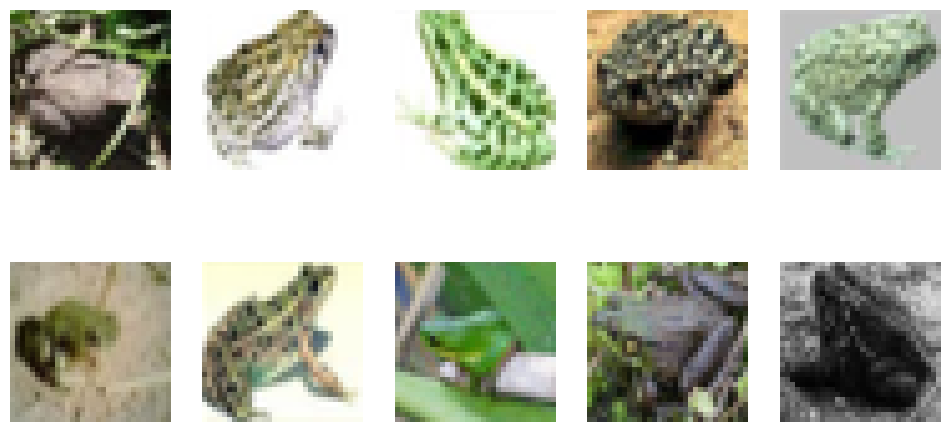

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, idx in enumerate(top_similar_indices):
    image_path = image_paths[idx]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.axis("off")
plt.show()